In [1]:
#import requaired library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
tdata=pd.read_excel("flight_train.xlsx")

In [3]:
tdata

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
tdata.shape

(10683, 11)

In [5]:
testdata=pd.read_excel("flight_test.xlsx")

In [6]:
testdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
testdata.shape

(2671, 10)

In [8]:
tdata.isnull().sum() #check the null values in our dataset

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#check the information of data
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [14]:
#check the columns name in our data set
testdata.columns 


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [12]:
#check the null value in our data set
tdata.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

in the above we have 2 null values

In [15]:
#check the totall row and columns value
tdata.shape

(10683, 11)

In [16]:
#we have only 2 null value so we can drop this 
tdata.dropna(inplace=True)

In [17]:
#now chacke the null values 
tdata.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

we dont have null values

In [18]:
tdata.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [19]:
#check the types of data like numeric or int 
tdata.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

we can follow the step bellow but we will not do becouse its coz of data lickage 
we will do sepratly

In [20]:
price_train = tdata.Price  
# Concatenate training and test sets 
data = pd.concat([tdata.drop(['Price'], axis=1), testdata])

In [21]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [22]:
#To check the first five rows of the data, type 
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


In [24]:
data = data.drop_duplicates()
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


use first train data set

In [26]:
#We’d want to check for any null values in our data, therefore,
tdata.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# Converting into Datetime:

In [28]:
# here we will extract date and month from Date of Journey
#day
tdata["journey_Date"]= pd.to_datetime(tdata['Date_of_Journey'], format= "%d/%m/%Y").dt.day

#month
tdata["journey_Month"]= pd.to_datetime(tdata['Date_of_Journey'], format= "%d/%m/%Y").dt.month
#year
#tdata["journey_Month"]= pd.to_datetime(tdata['Date_of_Journey'], format= "%d/%m/%Y").dt.year
# Lets check the first 5 rows
tdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [29]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
tdata.drop(['Date_of_Journey'],axis=1,inplace=True)

We Extracted the day and month from the “Date_of_Journey” column and we dropped it

In [30]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
tdata['Dep_hour']=pd.to_datetime(tdata['Dep_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
tdata['Dep_min']=pd.to_datetime(tdata['Dep_Time']).dt.minute

#Now we will drop the dep_time, no use
tdata.drop(['Dep_Time'],axis=1,inplace=True)

In [31]:
tdata.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [32]:
# Arrival time 

# Extracting Hours
tdata['Arrival_hour']=pd.to_datetime(tdata['Arrival_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
tdata['Arrival_min']=pd.to_datetime(tdata['Arrival_Time']).dt.minute

#Now we will drop the Arrival_time, no use
tdata.drop(['Arrival_Time'],axis=1,inplace=True)
tdata.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [35]:
# Assigning and converting Duration column into list
duration = list(tdata["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:  # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [38]:
tdata["Duration_hours"] = duration_hours
tdata["Duration_mins"] = duration_mins

#we will remove the DUrtaion clumns
tdata.drop(['Duration'],axis=1,inplace=True)

In [39]:
tdata.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


# Handling Categorical Data

Airline, Source, Destination, Route, Total_Stops, Additional_info are the categorical variables we have in our data.
Let’s handle each one by one

In [41]:
tdata['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [42]:
tdata['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Jet Airways has occurred maximum numbers of times followed by IndiGo and Air India.

In [43]:
#OneHotEncoding -----> Nominal data
Airline = tdata[["Airline"]]
Airline = pd.get_dummies(tdata['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


see how the Airline variable is related to the Price variable.

Text(0.5, 1.0, 'Airline vs Price')

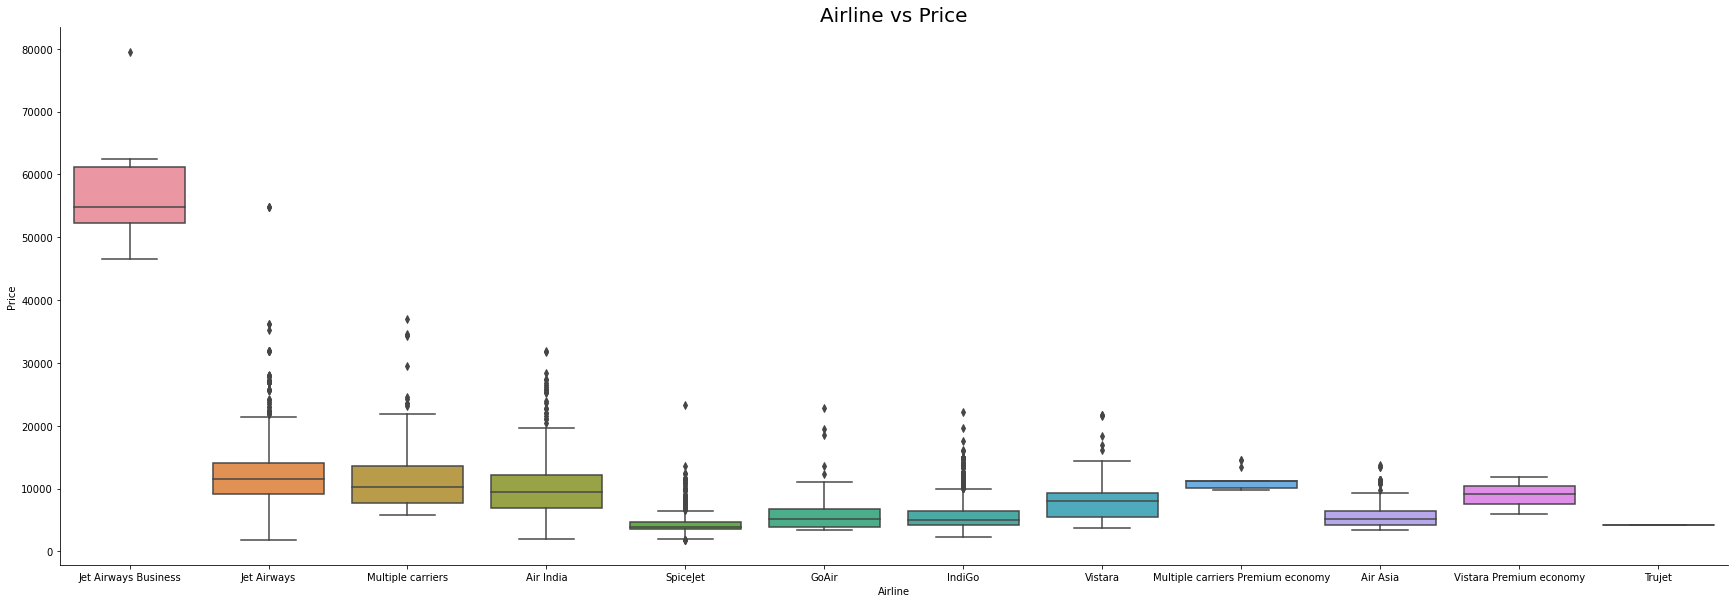

In [47]:
sns.catplot(y = "Price", x = "Airline", data = tdata.sort_values("Price", ascending = False), kind="box",height = 8, aspect = 3)
plt.title("Airline vs Price",fontsize=20)

The most expensive option is ‘JetAirways Business.’ The cost of other carriers varies as well

Text(0.5, 1.0, 'source vs price')

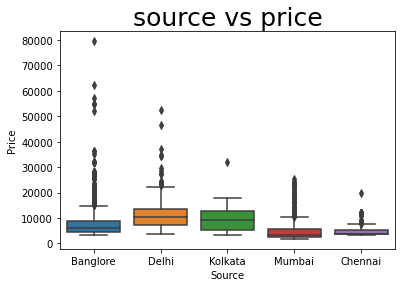

In [48]:
# Source vs Price

sns.boxplot(y = "Price", x = "Source", data = tdata.sort_values("Price", ascending = False))
plt.title("source vs price",fontsize=25)

In [49]:
#OneHotEncoding -----> Nominal data
Source = tdata[["Source"]]
Source = pd.get_dummies(tdata['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [50]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = tdata[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


Text(0.5, 1.0, 'dustination of flight')

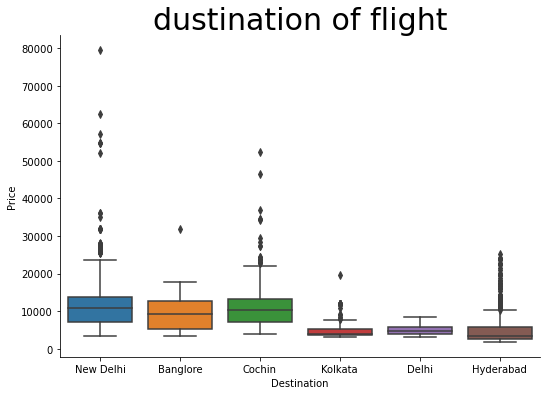

In [58]:
sns.catplot(y = "Price", x = "Destination", data = tdata,kind="box",aspect =1.5)
plt.title("dustination of flight",fontsize=30)

In [51]:
# droping column, because Additinal_info has since 80 % has no information 
# Route---> is related to no of stops
tdata.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Total_Stops Variable:
Non-stop refers to a flight with no stops, i.e. a straight flight. It is self-evident that other values have the same meaning.
We can see that it’s Ordinal Categorical Data, thus we’ll use LabelEncoder to deal with it.

In [52]:
tdata['Total_Stops'].value_counts()
# As this is case of Ordinal Categorical type we perform LabelEncoder
#we replace the values in key values 
tdata.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
tdata.head()

,Airline,Source,Destination,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [53]:
#Concatenate dataframe --> train_data + Airline + Source + Destination
train_data=pd.concat([tdata,Airline , Source, Destination],axis=1)
# we have drop the varibles
train_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)
train_data.head()

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [54]:
train_data.shape

(10682, 30)

 the final data  has 30 variables, including the dependent variable ‘Price.’ For training, there are only 29variables.

# test data set

apply the same process for test data set

In [56]:
testdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [59]:
testdata.shape

(2671, 10)

In [60]:
testdata.isnull().sum() #check the null values in our test dataset

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [62]:
#check the types of data like numeric or int 
testdata.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [63]:
#check the basic information about dataset
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [64]:
#check the columns name
testdata.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [65]:
testdata.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

in above step we dont have any null values we move ahade

# convert into date and time 

In [66]:
# here we will extract date and month from Date of Journey
#day
testdata["journey_Date"]= pd.to_datetime(testdata['Date_of_Journey'], format= "%d/%m/%Y").dt.day

#month
testdata["journey_Month"]= pd.to_datetime(testdata['Date_of_Journey'], format= "%d/%m/%Y").dt.month
#year
#testdata["journey_Month"]= pd.to_datetime(testdata['Date_of_Journey'], format= "%d/%m/%Y").dt.year

# Lets check the first 5 rows
testdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_Date,journey_Month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [67]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
testdata.drop(['Date_of_Journey'],axis=1,inplace=True)

In [68]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
testdata['Dep_hour']=pd.to_datetime(testdata['Dep_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
testdata['Dep_min']=pd.to_datetime(testdata['Dep_Time']).dt.minute

#Now we will drop the dep_time, no use
testdata.drop(['Dep_Time'],axis=1,inplace=True)

In [69]:
# Similar to Date_of_Journey we can extract values from arrival_Time

# Extracting Hours
testdata['Arrival_hour']=pd.to_datetime(testdata['Arrival_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
testdata['arrival_min']=pd.to_datetime(testdata['Arrival_Time']).dt.minute

#Now we will drop the arrival_time, no use
testdata.drop(['Arrival_Time'],axis=1,inplace=True)

In [72]:
# Assigning and converting Duration column into list
duration = list(testdata["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:  # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [73]:
testdata["Duration_hours"] = duration_hours
testdata["Duration_mins"] = duration_mins

#we will remove the DUrtaion clumns
testdata.drop(['Duration'],axis=1,inplace=True)

In [74]:
testdata.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0


# Handling Categorical Data

In [75]:
#check the unique values
testdata['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [76]:
#check the totall values
testdata['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Jet Airways has occurred maximum numbers of times followed by IndiGo and Air India.

In [77]:
#OneHotEncoding -----> Nominal data
Airline = testdata[["Airline"]]
Airline = pd.get_dummies(testdata['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [83]:
#OneHotEncoding -----> Nominal data
Source = testdata[["Source"]]
Source = pd.get_dummies(testdata['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [84]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = testdata[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [85]:
# droping column, because Additinal_info has since 80 % has no information 
# Route---> is related to no of stops
testdata.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Total_Stops Variable:
Non-stop refers to a flight with no stops, i.e. a straight flight. It is self-evident that other values have the same meaning.
We can see that it’s Ordinal Categorical Data, thus we’ll use LabelEncoder to deal with it.

In [86]:
testdata['Total_Stops'].value_counts()
# As this is case of Ordinal Categorical type we perform LabelEncoder
#we replace the values in key values 
testdata.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
testdata.head()

,Airline,Source,Destination,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [87]:
#Concatenate dataframe --> train_data + Airline + Source + Destination
test_data=pd.concat([testdata,Airline , Source, Destination],axis=1)
# we have drop the varibles
test_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)
test_data.head()

,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [89]:
test_data.shape

(2671, 28)

In [90]:
train_data.shape

(10682, 30)

# Creating Independent and dependent variables:
Independent variables

In [91]:
x=train_data.drop(['Price'],axis=1)
y=train_data.Price

In [93]:
x.head(2)

,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0


In [94]:
y.head(2)

0    3897
1    7662
Name: Price, dtype: int64

# Correlation:
Correlation is a technique for determining the link between two variables, which is useful in real life since it allows us to forecast the value of one variable using other factors that are connected with it.
Because two variables are involved, it is a sort of bivariate statistic.

<AxesSubplot:>

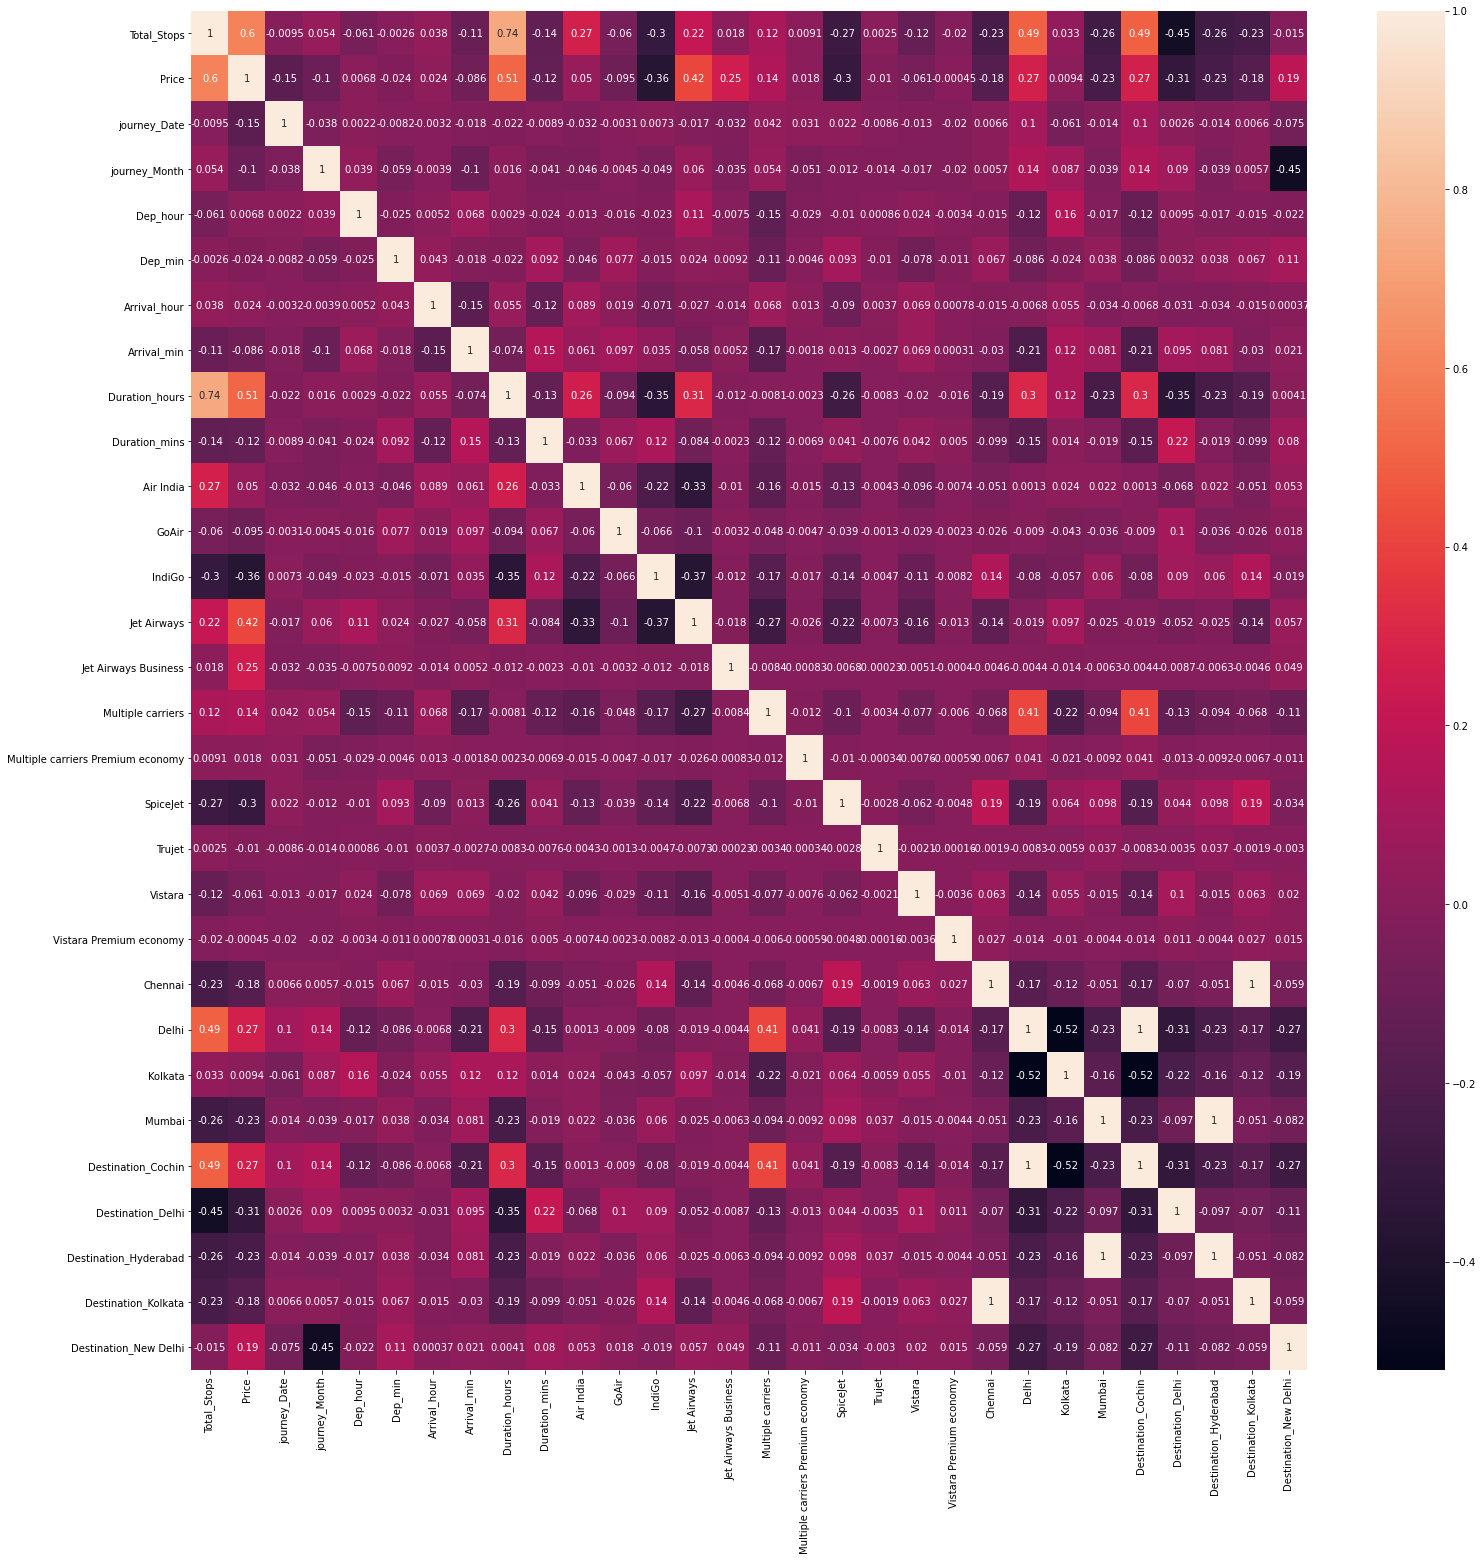

In [95]:
# Heatmap
plt.figure(figsize=(25,25))
sns.heatmap(train_data.corr(),annot = True)

In [97]:
#Removing correlated features
Threshold=0.9
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(x,Threshold)

{'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata'}

# Feature importance:
In machine learning, the purpose of feature selection is to discover the best set of 
characteristics that allowsone to develop usable models of the phenomena being examined.

In [98]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

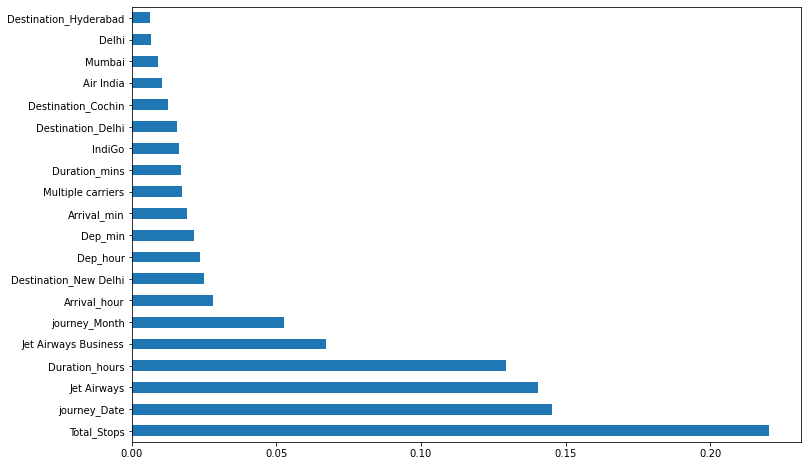

In [99]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# fitting model using random forest

Train Test split

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Building the model

In [134]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

Predicting the Model

In [135]:
#Predicting the Model
y_pred = reg_rf.predict(x_test)

 Evaluating the Model

In [136]:
print("train score",reg_rf.score(x_train, y_train))
print("test score",reg_rf.score(x_test, y_test))

train score 0.9555194183153765
test score 0.8110346074242155


In [163]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,y_pred))
rmse

ValueError: Found input variables with inconsistent numbers of samples: [3205, 2137]

Text(0.5, 1.0, 'error graph and should be mean=0')

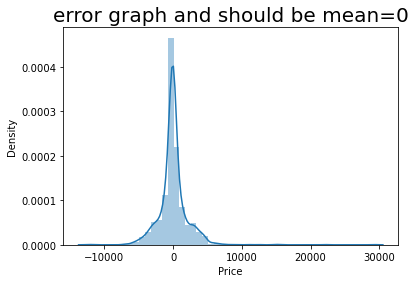

In [139]:
#Plotting the error graph and should be mean=0
sns.distplot(y_test-y_pred)
plt.title("error graph and should be mean=0",fontsize=20)

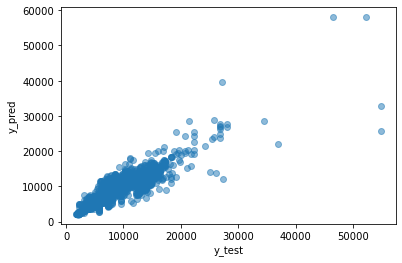

In [140]:
#Plotting scatter graph to check linear relations
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [141]:
from sklearn import metrics

In [142]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1245.1800613481432
MSE: 4433728.068987084
RMSE: 2105.6419612524546


In [143]:
metrics.r2_score(y_test, y_pred)

0.8110346074242155

the r2 score of 81 percent, With this model, we can also calculate the  mean absolute error,
mean squared error,and root mean squared error (regression metrics).
We will try to improve the accuracy by doing hyperparameter tuning.

In [171]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1360.350005200208
MSE: 6232256.719776218
RMSE: 2496.448821781896


In [172]:
metrics.r2_score(y_test, y_pred)

0.6945110950944287

# hyperparameter tuning


Choose following method for hyperparameter tuning

RandomizedSearchCV --> Fast

GridSearchCV

Assign hyperparameters in form of dictionery

Fit the model

Check best paramters and best score

In [144]:
from sklearn.model_selection import RandomizedSearchCV

In [145]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [146]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

optimal parameters

In [147]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

Fitting the model

In [148]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  17.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  19.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  28.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  21.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [149]:
# Finding the best parameter we should give in 
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

Predicting the tunned model

In [150]:
prediction = rf_random.predict(x_test)

Text(0.5, 1.0, 'Error graph')

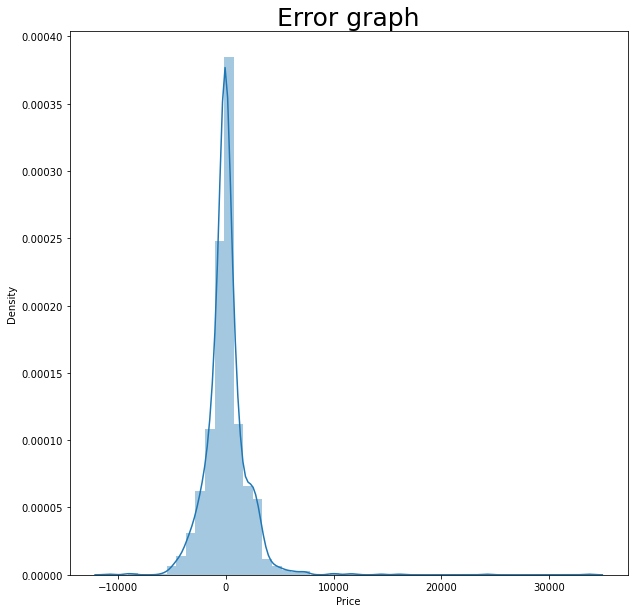

In [151]:

plt.figure(figsize = (10,10))
sns.distplot(y_test-prediction)
plt.title("Error graph",fontsize=25)

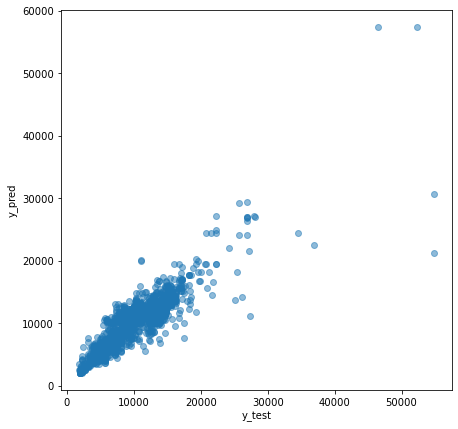

In [152]:
plt.figure(figsize = (7,7))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [155]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
#accuracy
metrics.r2_score(y_test,prediction)

MAE: 1201.1595610966915
MSE: 4062955.7657676386
RMSE: 2015.6774954758112


0.826836914815182

After hyper tuning, the r2 score for random forest Regressor is 82.6 percent